## NLP Project "Hate Speech Detection using Transformers (DL)" 

Group Name: individually

Name: Kristina Kaliagina

Email: kalyagina.kristina@gmail.com

Country: Russia

College/Company: Graduated from the University “Higher School of Economics”

Specialization: NLP

###### Problem description 

The task of the project is to classify tweets from Twitter, namely, it is necessary to create a model that will help determine whether a particular tweet belongs to such a type of speech as hate speech. Hate Speech, in simple terms, is offensive language directed at individuals or groups based on their affiliation, interests, and characteristics, such as their religion, nationality, race, color, origin, gender, or other identity factor.

The task is quite difficult because of the inherent complexity of natural language constructs - different forms of hatred, different types of goals, different ways of representing the same meaning.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.utils import resample
import warnings 
warnings.filterwarnings("ignore")

## Additional functions

In [2]:
def vectorization(table):
    #CountVectorizer will convert a collection of text documents to a matrix of token counts
    #Produces a sparse representation of the counts 
    #Initialize
    vector = CountVectorizer()
    #We fit and transform the vector created
    frequency_matrix = vector.fit_transform(table.clean_tweet)
    #Sum all the frequencies for each word
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #Now we use squeeze to remove single-dimensional entries from the shape of an array that we got from applying np.asarray to
    #the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    #Now we get into a dataframe all the frequencies and the words that they correspond to
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

In [3]:
def graph(word_frequency, sent):
    labels = word_frequency[0][1:51].index
    title = "Word Frequency for %s" %sent
    #Plot the figures
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    #plt.title('Word Frequency for %s', size=18) %sent;
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show()

In [4]:
def regression_graph(table):
    table = table[1:]
    #We set the style of seaborn
    sns.set_style("whitegrid")   
    #Initialize the figure
    plt.figure(figsize=(6,6))
    
    #we obtain the points from matplotlib scatter
    points = plt.scatter(table["Positive"], table["Negative"], c=table["Positive"], s=75, cmap="bwr")
    #graph the colorbar
    plt.colorbar(points)
    #we graph the regplot from seaborn
    sns.regplot(x="Positive", y="Negative",fit_reg=False, scatter=False, color=".1", data=table)
    plt.xlabel("Frequency for Positive Tweets", size=14)
    plt.ylabel("Frequency for Negative Tweets", size=14)
    plt.title("Word frequency in Positive vs. Negative Tweets", size=14)
    plt.grid(False)
    sns.despine()

In [5]:
def wordcloud(label, df):
    #take all words in df['clean_tweet'] with the labels 0 or 1 for visualization
    normal_words = ' '.join([word for word in df['clean_tweet'][clean['label'] == label]])
    #set the wordcloud parameters
    wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
    print('Normal words')
    #plot the graph
    plt.figure(figsize= (12,8))
    plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
    plt.axis('off')
    return plt.show()

## Download data

In [6]:
clean=pd.read_csv('./clean.csv')

In [7]:
clean

,label,tweet,clean_tweet,hashtag
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfu...,#run
1,0,@user @user thanks for #lyft credit i can't us...,thanks credit cant use cause offer wheelcha...,#lyft #disapointed #getthanked
2,0,bihday your majesty,bihday majesty,NaN
3,0,#model i love u take with u all the time in ...,love u take u time urd dddd ddd,#model
4,0,factsguide: society now #motivation,factsguide society,#motivation
...,...,...,...,...
29525,0,off fishing tomorrow @user carnt wait first ti...,fishing tomorrow carnt wait first time years,NaN
29526,0,ate @user isz that youuu?ðððððð...,ate isz youuudddddddddai,NaN
29527,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...,#shame #imwithher
29528,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad,NaN


## EDA

In [8]:
share_hs=clean[['label', 'tweet']].groupby(['label']).count()
share_hs

,tweet
label,
0,27517
1,2013


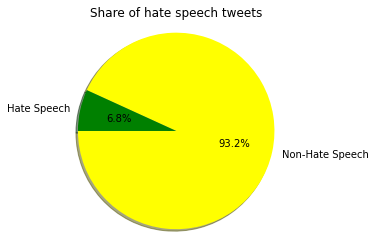

In [9]:
vals=[share_hs.tweet[0], share_hs.tweet[1]]
labels = ["Non-Hate Speech","Hate Speech"]
colors = ['yellow','green']
plt.title("Share of hate speech tweets")
plt.pie(vals,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Distribution of Class')

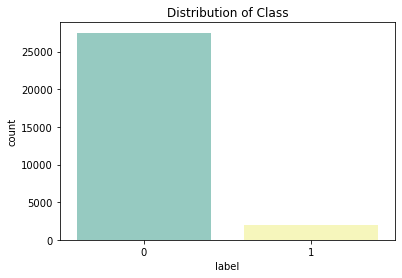

In [10]:
sns.countplot(clean['label'], palette='Set3').set_title('Distribution of Class')

There are more non hate speach than hate speech twitters (Unbalanced classes)

In [11]:
clean.describe()

,label
count,29530.000000
mean,0.068168
std,0.252038
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Average Word Length per label

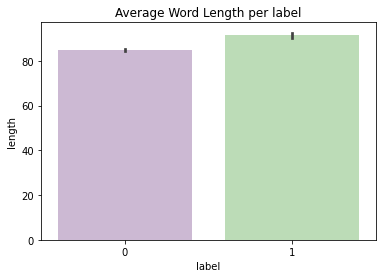

In [12]:
clean['length'] = clean['tweet'].apply(len)
fig1 = sns.barplot('label','length',data = clean,palette='PRGn')
plt.title('Average Word Length per label')
plot = fig1.get_figure()

The average length of words in tweets containing hate speech is slightly longer than in regular tweets.

In [13]:
clean = clean.dropna(axis='index', how='any', subset=['clean_tweet'])

### Word frequency

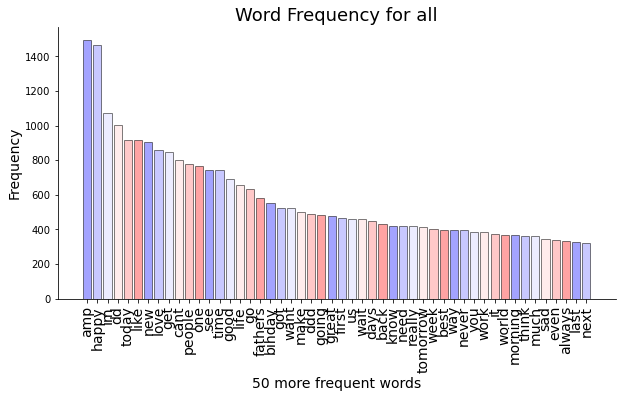

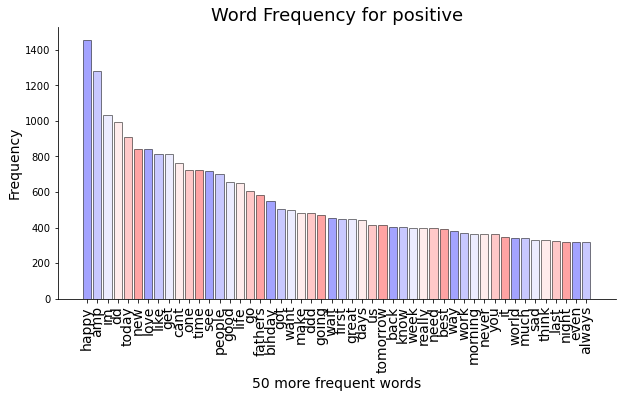

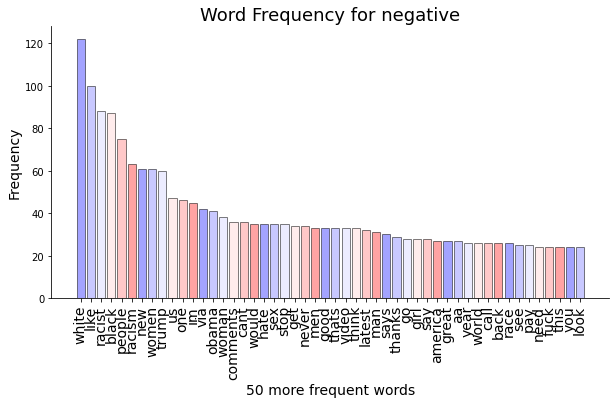

In [14]:
word_frequency = vectorization(clean).sort_values(0, ascending = False)
word_frequency_pos = vectorization(clean[clean['label'] == 0]).sort_values(0, ascending = False)
word_frequency_neg = vectorization(clean[clean['label'] == 1]).sort_values(0, ascending = False)

#Graph with frequency words all, positive and negative tweets and get the frequency
graph(word_frequency, 'all')
graph(word_frequency_pos, 'positive')
graph(word_frequency_neg, 'negative')

Regression:

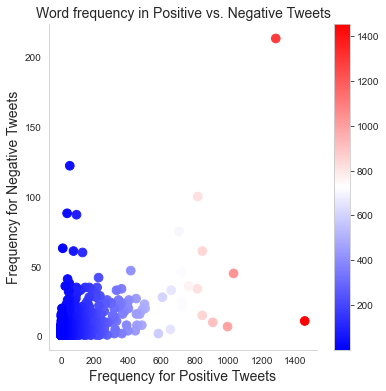

In [15]:
table_regression = pd.concat([word_frequency_pos, word_frequency_neg], axis=1, sort=False)
table_regression.columns = ["Positive", "Negative"]
regression_graph(table_regression)

### Wordcloud for non hate speech tweets

Normal words


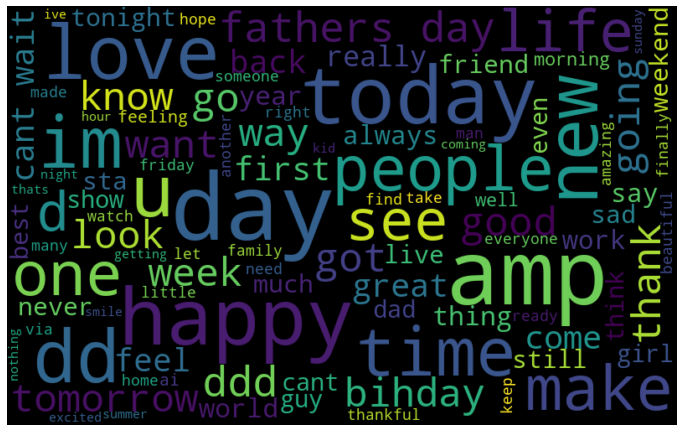

In [16]:
wordcloud(0, clean)

We can see that word's common in positive comments are: love, happy, friend, life, today, day, thank, time, see, new, people, one, i'm, fathers day, good and so on

### Wordcloud for hate speech tweets

Normal words


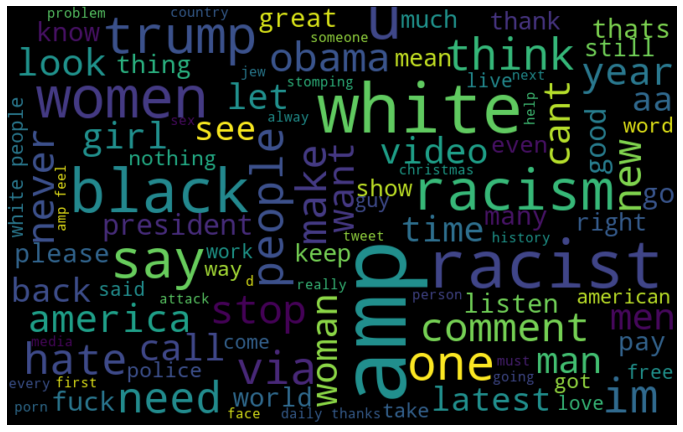

In [17]:
wordcloud(1, clean)

We can see that word's common in hate comments are: trump, hate, white, black, racist, racism, allahsoil, obama, women, never, america, stop and so on

### Unbalanced classes

In [18]:
train_majority = clean[clean.label==0]
train_minority = clean[clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

1    27503
0    27503
Name: label, dtype: int64

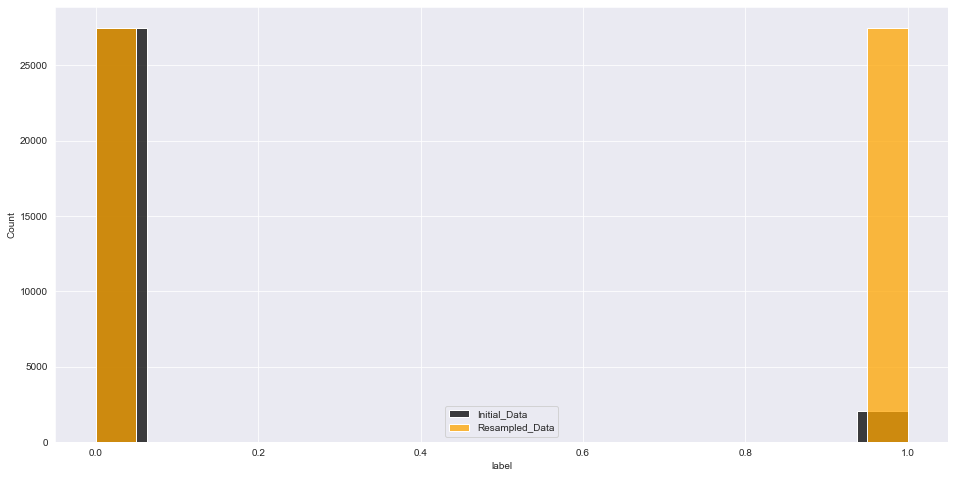

In [19]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.histplot(data = clean['label'], color='black', legend=True)
sns.histplot(data = train_upsampled['label'], color = 'orange', legend=True)
plt.legend(['Initial_Data', 'Resampled_Data'])
plt.show()

### Wordcloud for non hate speech tweets after resampling

Normal words


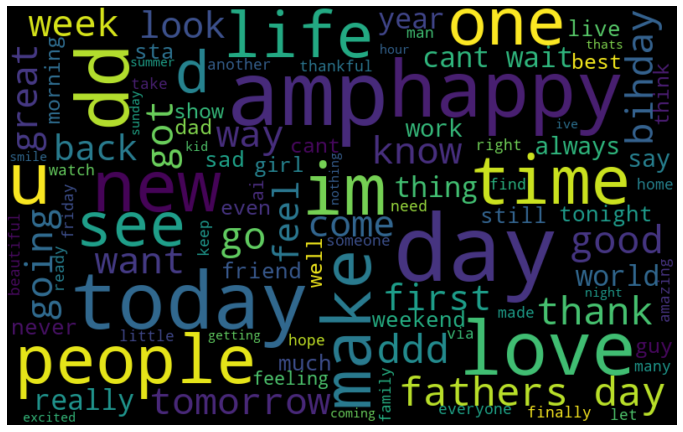

In [20]:
wordcloud(0, train_upsampled)

There are almost the same positive words as in the situation before the resample.

### Wordcloud for hate speech tweets after resampling

Normal words


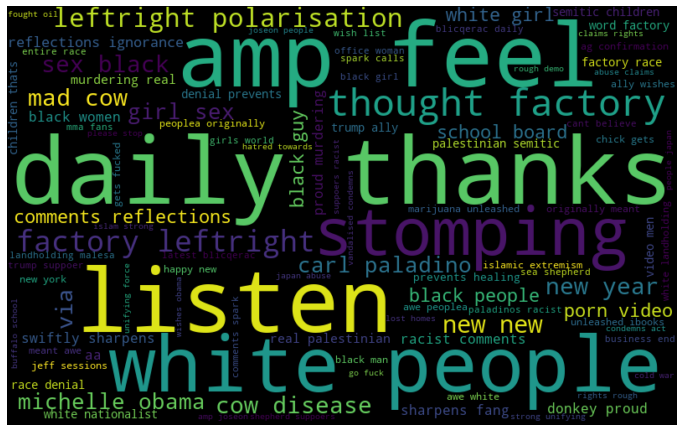

In [21]:
wordcloud(1, train_upsampled)

The last image observes words and people related to religion, politics and sex

In [22]:
train_upsampled

,label,tweet,clean_tweet,hashtag,length
22413,1,what does #mtv have against #whitepeople? #cco...,via,#mtv #whitepeople? #ccot,59
20524,1,@user @user mma fans: losses don't matter! mma...,mma fans losses matter mma fans rr lost twic...,#ufc207 #doublestandards,116
20701,1,#clickbait #much? thatâs a really shitty he...,thatas really shitty headline change it,#clickbait #much?,82
19945,1,boob camron diaz naked pics,boob camron diaz naked pics,NaN,28
29518,1,"makes you ask yourself, who am i? then am i a...",makes ask yourself i anybody god oh thank god,NaN,87
...,...,...,...,...,...
29525,0,off fishing tomorrow @user carnt wait first ti...,fishing tomorrow carnt wait first time years,NaN,61
29526,0,ate @user isz that youuu?ðððððð...,ate isz youuudddddddddai,NaN,68
29527,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...,#shame #imwithher,131
29528,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad,NaN,63


In [23]:
train_upsampled.to_csv('for_model.csv', encoding='utf-8', index=False)

## Final Recommendation

- The data was cleaned, namely by removing all the greek symbols, stopwords, slang words, thanks to the creation of a dictionary and the replacement of abbreviations, the removal of the word "user", since it does not carry any syllabic load. Also, a cleanup function was created using the re library, where usernames, hashtags, quotes, numbers, the word 'hmm', all punctuation and so on are removed.
- There is an imbalance of classes in the dataset, so we managed to restore the balance with the help of resampling. And also look at Wordcloud before and after.
- Next, we will apply transformers and deep learning models to predict the label class and evaluate the results.